<a href="https://colab.research.google.com/github/aicharya/ud120-projects/blob/master/regression/finance_regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/aicharya/ud120-projects.git

Cloning into 'ud120-projects'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 5197 (delta 6), reused 0 (delta 0), pack-reused 5185
Receiving objects: 100% (5197/5197), 19.78 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (4457/4457), done.


In [0]:
import os
os.chdir('ud120-projects/regression')

In [4]:
os.listdir(os.getcwd())

['finance_regression.ipynb',
 'finance_regression.py',
 'finance_regression_v2.ipynb']

In [0]:
import sys
import pickle
sys.path.append("../tools/")

In [0]:
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature

In [0]:
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification

In [0]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = reg.fit(feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points

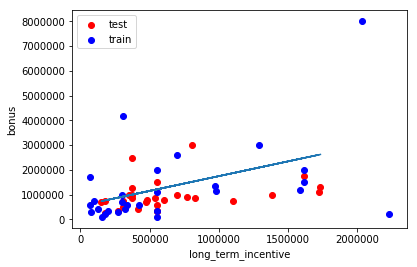

In [11]:
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Extract the slope (stored in the reg.coef_ attribute) and the intercept. What are the slope and intercept?

In [12]:
reg.coef_

array([1.19214699])

In [13]:
reg.intercept_

554478.7562150093

Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. What score do you find?

In [14]:
reg.score(feature_train, target_train)

0.21708597125777662

What’s that score on the testing data? 

In [15]:
reg.score(feature_test, target_test)

-0.5927128999498639